# Verze 1 řetízkového pravidla

**Věta.**
Předpokládejme, že $z = f(x,y)$ je diferencovatelná funkce proměnných $x,$ $y$ a $x = g(t),$ $y = h(t)$ jsou obě diferencovatelné funkce proměnné $t$.
Potom je složená funkce $z = f(g(t), h(t))$ diferencovatelnou funkcí proměnné $t$ a platí:
$$
    \frac{dz}{dt} = \frac{\partial f}{\partial x}\frac{dx}{dt} + \frac{\partial f}{\partial y}\frac{dy}{dt}.\tag{*}
$$

Pokud nahradíme symbol parciální derivace $\frac{\partial f}{\partial x}$ symbolem $\frac{\partial z}{\partial x}$, potom má vzorec (*) tuto podobu:
$$
    \frac{dz}{dt} = \frac{\partial z}{\partial x}\frac{dx}{dt} + \frac{\partial z}{\partial y}\frac{dy}{dt}.\tag{*'}
$$

## Příklad

Nechť $z = x^2y + 3xy^4$ a nechť $x = \sin(2t),\ y = \cos(t).$ Potom najděte derivaci $dz/dt$ když $t = 0.$

### Řešení

In [6]:
# Aplikace řetízkového pravidla
var("x, y, t")
t0 = 0.5; show("t0 = \t", t0)
z = x^2 * y + 3 * x * y^4; show("z = \t", z)
g(t) = sin(2*t); show("x = g(t) = \t", g(t))
h(t) = cos(t); show("y = h(t) = \t", h(t))
print("-"*80)
print("Řešení:")
z_x = z.diff(x); show("z_x = \t", z_x)
z_y = z.diff(y); show("z_y = \t", z_y)
dg = g(t).diff(t); show("dx/dt = g'(t) = \t", dg)
dh = h(t).diff(t); show("dy/dt = h'(t) = \t", dh)
# nyní aplikujme vzorec (*):
dz_dt = z_x * dg + z_y * dh
show("dz/dt = \t", dz_dt)
show("dz/dt = \t", )
show("t = t0, \t", "x = g(0) = \t", g(t0), ", y = h(0) = \t", h(t0))
show("dz/dt|_(t=t0) = \t", dz_dt(t=t0, x = g(t0), y = h(t0)))

't0 = \t' 0.500000000000000

'z = \t' 3*x*y^4 + x^2*y

'x = g(t) = \t' sin(2*t)

'y = h(t) = \t' cos(t)

--------------------------------------------------------------------------------
Řešení:


'z_x = \t' 3*y^4 + 2*x*y

'z_y = \t' 12*x*y^3 + x^2

"dx/dt = g'(t) = \t" 2*cos(2*t)

"dy/dt = h'(t) = \t" -sin(t)

'dz/dt = \t' 2*(3*y^4 + 2*x*y)*cos(2*t) - (12*x*y^3 + x^2)*sin(t)

'dz/dt = \t'

't = t0, \t' 'x = g(0) = \t' 0.841470984807897 ', y = h(0) = \t' 0.877582561890373

'dz/dt|_(t=t0) = \t' -0.0926165940332813

Nakresleme si nyní křivku $C$ danou parametricky rovnicemi:
$$
x = \sin(2t),\ \ \ y = cos(t).
$$

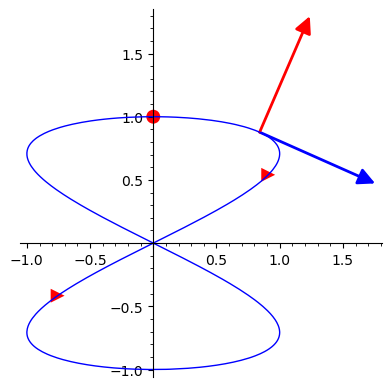

In [25]:
var("t")
x = sin(2*t); y = cos(t)
t0 = .5
X = vector([x.subs(t=t0), y.subs(t=t0)])
p1 = parametric_plot((x,y), (t, 0, 2*pi))
p2 = point((0,1), marker="o", color="red", size=100)
p3 = point([(sin(2*1),cos(1)), (sin(2*2), cos(2))], marker=">", color="red", size=100)
t_vector = arrow2d(tailpoint=X, headpoint=X + vector([x.diff(t).subs(t=t0), y.diff(t).subs(t=t0)]).normalized())
gradient = arrow2d(tailpoint=X, headpoint=X + z.gradient().subs(x = X[0], y=X[1]).normalized(), color="red")
(p1 + p2 + p3 + t_vector + gradient).show()

In [3]:
float(cos(1/2)) , float(sin(1))

(0.8775825618903728, 0.8414709848078965)

In [4]:
float(cos(1)), float(sin(1/2))

(0.5403023058681398, 0.479425538604203)

# Verze 2 řetízkového pravidla

**Věta.**
Předpokládejme, že $z = f(x,y)$ je diferencovatelná funkce proměnných $x,y$ a kde $x = g(s,t),\ y = h(s,t)$ jsou diferencovatelné funkce proměnných $s,t.$ Potom je složená funkce $z = f(g(s,t), h(s,t))$ diferencovatelnou funkcí a platí:
$$
\frac{\partial z}{\partial s} = \frac{\partial z}{\partial x}\frac{\partial x}{\partial s} + \frac{\partial z}{\partial y}\frac{\partial y}{\partial s}\ \ \ \frac{\partial z}{\partial t} = \frac{\partial z}{\partial x}\frac{\partial x}{\partial t} + \frac{\partial z}{\partial y}\frac{\partial y}{\partial t}.
$$

## Příklad

Předpokládejme, že $z = e^x\sin(y),$ a $x = st^2,\ y = s^2t.$ Najděte parciální derivace $\partial z/\partial s$ a $\partial z/\partial t.$

### Řešení
Aplikujme druhou verzi řetízkového pravidla!

In [8]:
var("x, y, s, t")
z = e^x * sin(y); show("z = \t", z)

'z = \t' e^x*sin(y)

In [9]:
g(s,t) = s * t^2; show("x = g(s,t) = \t", g(s,t))
h(s,t) = s^2 * t; show("y = h(s,t) = \t", h(s,t))

'x = g(s,t) = \t' s*t^2

'y = h(s,t) = \t' s^2*t

In [10]:
dz_ds = z.diff(x) * g(s,t).diff(s) + z.diff(y) * h(s,t).diff(s)
dz_dt = z.diff(x) * g(s,t).diff(t) + z.diff(y) * h(s,t).diff(t)
show("dz_ds = \t", dz_ds)
show("dz_dt = \t", dz_dt)
print("Dosaďme za x a za y: ")  # substituce za x a za y
show("dz_ds(s,t) = \t", dz_ds(x = g(s,t), y = h(s,t)))
show("dz_dt(s,t) = \t", dz_dt(x = g(s,t), y = h(s,t)))

'dz_ds = \t' 2*s*t*cos(y)*e^x + t^2*e^x*sin(y)

'dz_dt = \t' s^2*cos(y)*e^x + 2*s*t*e^x*sin(y)

Dosaďme za x a za y: 


'dz_ds(s,t) = \t' 2*s*t*cos(s^2*t)*e^(s*t^2) + t^2*e^(s*t^2)*sin(s^2*t)

'dz_dt(s,t) = \t' s^2*cos(s^2*t)*e^(s*t^2) + 2*s*t*e^(s*t^2)*sin(s^2*t)

# Verze 3 (obecná) řetízkového pravidla

**Věta.**
Předpokládejme, že funkce $u = f(x_1,\ldots,x_n)$ je diferencovatelná funkce proměnných $x_1,\ldots,x_n$ a každá funkce $x_j = g_j(t_1,\ldots,t_m)$ je diferencovatelná funkce proměnných $t_1,\ldots,t_m.$ Potom je složená funkce $u$ proměnných $t_1,\ldots,t_m$ diferencovatelnou funkcí a platí pro každé $i = 1,\ldots,m$
$$
\frac{\partial u}{\partial t_i} = \sum_{j=1}^n \frac{\partial u}{\partial x_j}\frac{\partial x_j}{\partial t_i}.
$$







## Příklad

Nechť $u = x^4y + y^2z^3,$ kde $x = rse^t,$ $y = rs^2e^{-t}$ a $z = r^2s\sin(t).$ Najděte derivaci $\partial u/\partial s,$ jestliže $r = 2,\ s = 1,\ t = 0.$

### Řešení

In [1]:
var("x, y, z, r, s, t")
u = x^4 * y + y^2 * z^3; show("u = \t", u)
g(r,s,t) = r * s * e^t; show("x = g(r,s,t) = \t", g(r,s,t))
h(r,s,t) = r * s^2 * e^(-t); show("y = h(r,s,t) = \t", h(r,s,t))
w(r,s,t) = r^2 * s * sin(t); show("z = w(r,s,t) = \t", w(r,s,t))
u_x = u.diff(x); u_y = u.diff(y); u_z = u.diff(z)
# aplikujme vzorec pro výpočet parciální derivace u podle s:
u_s = u_x * g(r,s,t).diff(s) + u_y * h(r,s,t).diff(s) + u_z * w(r,s,t).diff(s)
print("Aplikujte řetízkové pravidlo:")
input("Pro pokračování stiskni klávesu!")
show(u_s)
print("Dosaďme za r=2, s=1, t=0 a za x, y, z d
      osaďte odpovídající hodnoty těchto proměnných: ")
input("Pro pokračování stiskni klávesu!")
show("u_s(r=2, s=1, t=0) = \t", u_s(r=2, s=1, t=0, x = g(r=2, s=1, t=0), y = h(r=2, s=1, t=0), z = w(r=2, s=1, t=0)))

'u = \t' x^4*y + y^2*z^3

'x = g(r,s,t) = \t' r*s*e^t

'y = h(r,s,t) = \t' r*s^2*e^(-t)

'z = w(r,s,t) = \t' r^2*s*sin(t)

Aplikujte řetízkové pravidlo:


Pro pokračování stiskni klávesu! 

3*r^2*y^2*z^2*sin(t) + 4*r*x^3*y*e^t + 2*(x^4 + 2*y*z^3)*r*s*e^(-t)

Dosaďme za r=2, s=1, t=0 a za x, y, z dosaďte odpovídající hodnoty těchto proměnných: 


Pro pokračování stiskni klávesu! 

'u_s(r=2, s=1, t=0) = \t' 192

In [4]:
var("x, y, z, r, s, t")
print("r = 2, s = 1, t = 0")
u = SR(input("u = ")); show("u = \t", u)
g(r,s,t) = SR(input("x = ")); show("x = g(r,s,t) = \t", g(r,s,t))
h(r,s,t) = SR(input("y = ")); show("y = h(r,s,t) = \t", h(r,s,t))
w(r,s,t) = SR(input("z = ")); show("z = w(r,s,t) = \t", w(r,s,t))
u_x = u.diff(x); u_y = u.diff(y); u_z = u.diff(z)
# aplikujme vzorec pro výpočet parciální derivace u podle s:
u_s = u_x * g(r,s,t).diff(s) + u_y * h(r,s,t).diff(s) + u_z * w(r,s,t).diff(s)
print("Aplikujte řetízkové pravidlo:")
input("Pro pokračování stiskni klávesu!")
show("u_s = \t", u_s)
print("Dosaďme za r=2, s=1, t=0 a za x, y, z dosaďte odpovídající hodnoty těchto proměnných: ")
input("Pro pokračování stiskni klávesu!")
show("u_s(r=2, s=1, t=0) = \t", u_s(r=2, s=1, t=0, x = g(r=2, s=1, t=0), y = h(r=2, s=1, t=0), z = w(r=2, s=1, t=0)))

r = 2, s = 1, t = 0


u =  sin(x*y) + z

'u = \t' z + sin(x*y)

x =  r^2 - s^2

'x = g(r,s,t) = \t' r^2 - s^2

y =  r + t

'y = h(r,s,t) = \t' r + t

z =  t^3

'z = w(r,s,t) = \t' t^3

Aplikujte řetízkové pravidlo:


Pro pokračování stiskni klávesu! 

'u_s = \t' -2*s*y*cos(x*y)

Dosaďme za r=2, s=1, t=0 a za x, y, z dosaďte odpovídající hodnoty těchto proměnných: 


Pro pokračování stiskni klávesu! 

'u_s(r=2, s=1, t=0) = \t' -4*cos(6)